In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tip=pd.read_csv("yelp_tip.csv")

%matplotlib inline

### yelp_tip.csv

In [3]:
print(tip.dtypes)
print(tip.head())

text           object
date           object
likes           int64
business_id    object
user_id        object
dtype: object
                                                text        date  likes  \
0  Great breakfast large portions and friendly wa...  2015-08-12      0   
1  Nice place. Great staff.  A fixture in the tow...  2014-06-20      0   
2                     Happy hour 5-7 Monday - Friday  2016-10-12      0   
3  Parking is a premium, keep circling, you will ...  2017-01-28      0   
4             Homemade pasta is the best in the area  2017-02-25      0   

              business_id                 user_id  
0  jH19V2I9fIslnNhDzPmdkA  ZcLKXikTHYOnYt5VYRO5sg  
1  dAa0hB2yrnHzVmsCkN4YvQ  oaYhjqBbh18ZhU0bpyzSuw  
2  dAa0hB2yrnHzVmsCkN4YvQ  ulQ8Nyj7jCUR8M83SUMoRQ  
3  ESzO3Av0b1_TzKOiqzbQYQ  ulQ8Nyj7jCUR8M83SUMoRQ  
4  k7WRPbDd7rztjHcGGkEjlw  ulQ8Nyj7jCUR8M83SUMoRQ  


In [5]:
print(tip.tail())

                                                      text        date  likes  \
1098319              Awesome food great live entertainment  2017-12-03      0   
1098320  Amazing! Great food and prices. Upgrade to the...  2017-12-04      0   
1098321  Great new place. Staff was very friendly and h...  2017-12-05      0   
1098322  We waited 1.5 hour for the food, asked multipl...  2017-12-08      0   
1098323  Beautiful location, beautiful event, beautiful...  2017-12-07      0   

                    business_id                 user_id  
1098319  AR0b2PPSBfl8SRUGx-QCmA  A9WQWLL7mN6cwOklTcbppg  
1098320  Cs8YvyehNELsgOsf5Us4Dg  FcWOFsW8dvG5BHTB_ZPyhg  
1098321  RWwcoU716D8j519RL7paVA  bQxvo4r6y6HImAJZShR3Eg  
1098322  ZqTXN4qh0Ta1Lp8Z3v-dKg  kA6L6nrjJnu1bfkLGN8l9Q  
1098323  aY0ZSpAK7h7-SmP6KVS8oA  eqtEDyqn1kCXwlo2OKdW_Q  


#### How many users are there?

In [8]:
users = tip.groupby('user_id')
len(users)

271679

#### What's the max number of reviews by a user?

In [9]:
users_by_tips = users.size().sort_values(ascending=False)

print(users_by_tips[:10])

top_tip_writer = users_by_tips.index[0]

print("\ntop tip writer: ", top_tip_writer)

user_id
mkbx55W8B8aPLgDqex7qgg    1905
6ZC-0LfOAGwaFc5XPke74w    1514
CxDOIDnH8gp9KXzpBHJYXw    1480
eZfHm0qI8A_HfvXScwIYsg    1340
O8eDScRAg6ae0l9Bc24uMA    1200
0tvCcnfJnSs55iB6mqPk3w    1192
8DGFWco9VeBAxjqsuh1aSw    1174
WJKocp9RE0KatUwh3_DkGg    1142
2EuPAGalYnP7eSxPgFCNDg    1080
5dKknvq65x-SaluuJjT0Kw     990
dtype: int64

top tip writer:  mkbx55W8B8aPLgDqex7qgg


#### Investigate top tip writer's amount of tips per day

date
2016-06-12    18
2016-10-22    17
2016-12-09    16
2015-10-16    15
2016-11-11    15
2017-06-29    15
2016-10-08    15
2015-10-18    13
2017-04-15    13
2015-07-14    13
dtype: int64


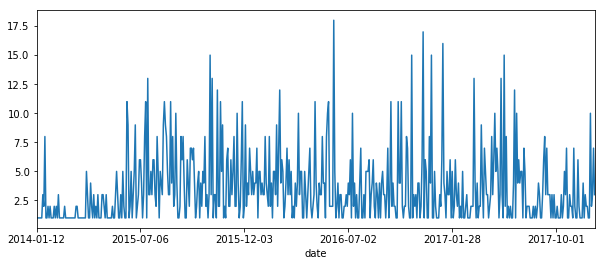

In [16]:
top_writers_tips = tip[tip.user_id == 'mkbx55W8B8aPLgDqex7qgg'].sort_values('date')

top_writers_tips_grpd_by_date = top_writers_tips.groupby('date')

top_writers_tips_by_date = top_writers_tips_grpd_by_date.size()  

print(top_writers_tips_by_date.sort_values(ascending=False)[:10])

top_writers_tips_by_date.plot(figsize=(10,4))

#### What tips did the top tipper give on his or her busiest day?

In [17]:
top_date = tip[(tip.date == '2016-06-12') & (tip.user_id == 'mkbx55W8B8aPLgDqex7qgg')]

print(top_date.text)

384602    Martin Nievera @ M Pavilion.  Martin is the co...
384984    First time ... crispy rice topped with spicy t...
385563    Slight physical changes to bar & front exterio...
385564    A few new pieces of kitchen equipment for roas...
385565    Snack Wagon Delight ... just $8 per selection....
385566    Smoked Trout with black sesame crackers . Seas...
385567    Steak tartare seasoned Thai style spicy raw be...
385568    Flat Bread topped with roast pork, smoked ham,...
385569    Sashimi of the day, fresh ahi tuna seasoned wi...
385570    Rock Shrimp Tempura seasoned with spicy aioli,...
385571    Roasted octopus served with preserved lemon, W...
385572    Alaskan Halibut served with artichokes, snap p...
385573    Sampler platter of meats: Lamb Chops, Culotte ...
385574                     Scalloped Potatoes. Cheesy good.
385575    Sautéed Spinach. Got to have something green w...
385576    Sweet Wagon Delights. Any 3 items but the cupc...
385577    Peach Cobbler with Cherry Bour

#### The word "wait" in tips

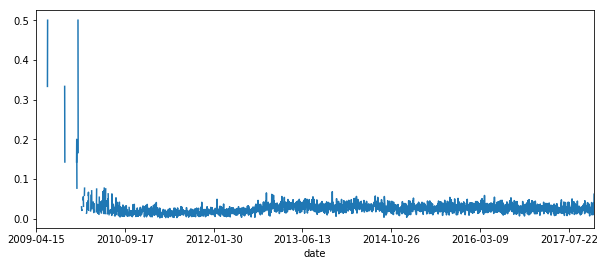

In [25]:
def word_trender(word):
    filt = tip['text'].str.extract('(?P<'+word+'>('+word+'))', expand=True)
    index = np.array(filt.notnull())
    word_in_tip = tip[index[:,0]]
    word_in_tip_gb_date = word_in_tip.groupby('date')
    word_in_tip_gb_date_size = word_in_tip_gb_date.size()/tip.groupby('date').size()
    word_in_tip_gb_date_size.plot(figsize=(10,4))
    
word_trender("wait")

#### How many businesses have tips?

In [10]:
businesses = tip.groupby('business_id')
len(businesses)


112365

#### What's the max number of tips for a business?

In [11]:
businesses_by_tips = businesses.size().sort_values(ascending=False)

print(businesses_by_tips[:10])

top_tipped_business = businesses_by_tips.index[0]

print("\ntop tipped business: ", top_tipped_business)


business_id
FaHADZARwnY4yvlvpnsfGA    3517
JmI9nslLD7KZqRr__Bg6NQ    2382
DkYS3arLOhA8si5uUEmHOw    1474
5LNZ67Yw9RD6nf4_UhXOjw    1436
K7lWdNUhCbcnEvI0NhGewg    1346
hihud--QRriCYZw1zZvW4g    1287
RESDUcs7fIiihp38-d6_6g    1149
yfxDa8RFOvJPQh0rNtakHA    1062
4JNXUYY8wbaaDmk3BPzlWw    1038
iCQpiavjjPzJ5_3gPD5Ebg    1033
dtype: int64

top tipped business:  FaHADZARwnY4yvlvpnsfGA


#### Investigate top business's tips written per day

date
2012-06-11    17
2012-06-08    13
2011-09-16    12
2011-05-09    12
2011-08-07    12
2011-11-13    12
2012-01-07    12
2012-02-23    12
2012-05-25    11
2012-08-13    11
dtype: int64


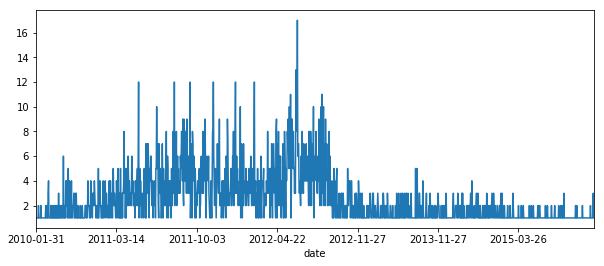

In [14]:
top_business_tips = tip[tip.business_id == 'FaHADZARwnY4yvlvpnsfGA'].sort_values('date')

top_business_tips_grpd_by_date = top_business_tips.groupby('date')

top_business_tips_by_date = top_business_tips_grpd_by_date.size()  

print(top_business_tips_by_date.sort_values(ascending=False)[:10])

top_business_tips_by_date.plot(figsize=(10,4))